In [17]:
import pickle
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, isfile

# data
irf = 'random' 
table = 'regressor_5sgm_xy_flip.pickle'
path = f'/home/dipiano/E4/irf_{irf}/crab/'
dataset = join(path, table)

# dataset 
if '.pickle' in table:
    with open(dataset,'rb') as f: ds = pickle.load(f)
elif '.npy' in table:
    ds = np.load(dataset, allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]

ds = np.array(ds['DS'])
ds = ds.reshape(ds.shape[0], ds.shape[1], ds.shape[2], 1)
ds.shape

(20000, 200, 200, 1)

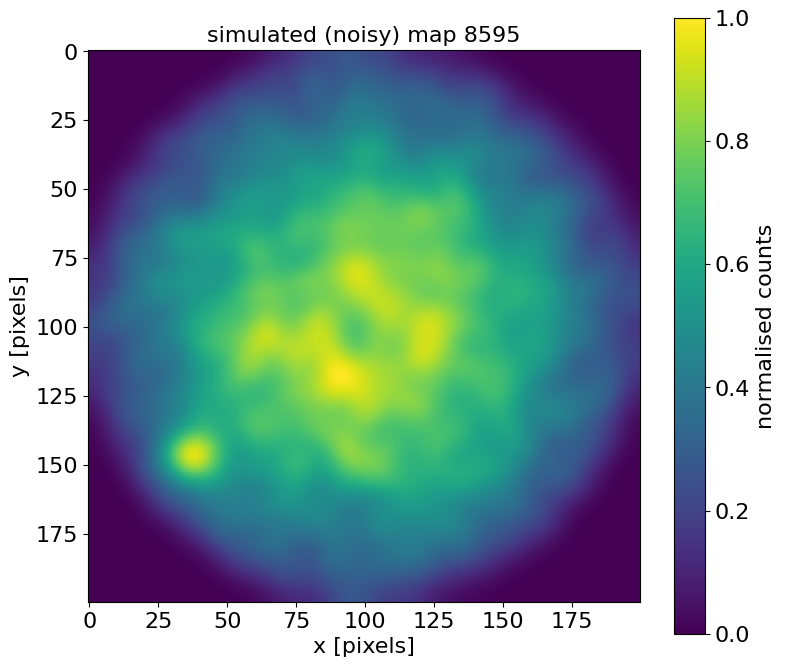

In [64]:
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

radius_deg = 0.2
radius_pix = radius_deg/0.025
figsize = (8, 8)
fs = 16

# find seed to get the original heatmap
idx = np.random.choice(range(len(ds)))
idx = 8594
seed = idx + 1

# PIX
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
img = ax.imshow(ds[idx], vmin=0, vmax=1)
ax.set_ylabel('y [pixels]', fontsize=fs)
ax.set_xlabel('x [pixels]', fontsize=fs)
ax.set_title(f'simulated (noisy) map {seed}', fontsize=fs)

cb = fig.colorbar(img, ax=ax, shrink=0.8)
ax.tick_params(axis='both', labelsize=fs)
cb.ax.tick_params(labelsize=fs)
cb.set_label('normalised counts', fontsize=fs)

plt.tight_layout()
plt.show()